# Exploring The Dataset

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout
from tensorflow.keras import models


In [2]:
imgs_path = r"C:\Users\yalla\OneDrive\Desktop\PracticalAI\CourseAssets\Train"  # corrected path
data = []
labels = []
classes = 43

for i in range(classes):
    img_path = os.path.join(imgs_path, str(i))  # folder 0 to 42
    for img in os.listdir(img_path):
        im = Image.open(os.path.join(img_path, img))
        im = im.resize((30, 30))
        im = np.array(im)
        data.append(im)
        labels.append(i)

data = np.array(data)
labels = np.array(labels)
print("success")


success


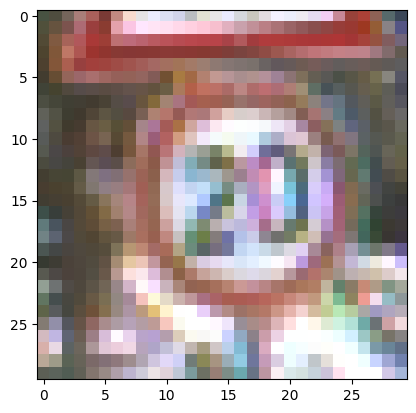

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

path = r"C:\Users\yalla\OneDrive\Desktop\PracticalAI\CourseAssets\Train\0\00000_00001_00002.png"  # Use your real file
img = Image.open(path)
img = img.resize((30, 30))
sr = np.array(img) 
plt.imshow(img)
plt.show()


In [4]:
!pip install scikit-learn
y = to_categorical(labels)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print("training shape: ",x_train.shape, y_train.shape)
print("testing shape: ",x_test.shape, y_test.shape)
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)


training shape:  (31367, 30, 30, 3) (31367,)
testing shape:  (7842, 30, 30, 3) (7842,)


In [5]:
model = models.Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation="softmax"))


C:\Users\yalla\.jupyter\New folder\envs\tf_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.2268 - loss: 4.3572 - val_accuracy: 0.8262 - val_loss: 0.7692
Epoch 2/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.7084 - loss: 1.0226 - val_accuracy: 0.9102 - val_loss: 0.3047
Epoch 3/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.8416 - loss: 0.5380 - val_accuracy: 0.9634 - val_loss: 0.1528
Epoch 4/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.8917 - loss: 0.3702 - val_accuracy: 0.9675 - val_loss: 0.1378
Epoch 5/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9067 - loss: 0.3245 - val_accuracy: 0.9684 - val_loss: 0.1002
Epoch 6/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9318 - loss: 0.2350 - val_accuracy: 0.9844 - val_loss: 0.0578
Epoch 7/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9351 - loss: 0.2292 - val_accuracy: 0.9823 - val_loss: 0.0668
Epoch 8/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9448 - loss: 0.1869 - val_a

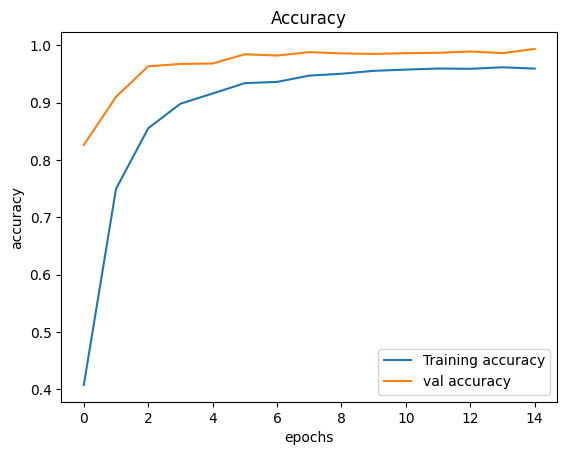

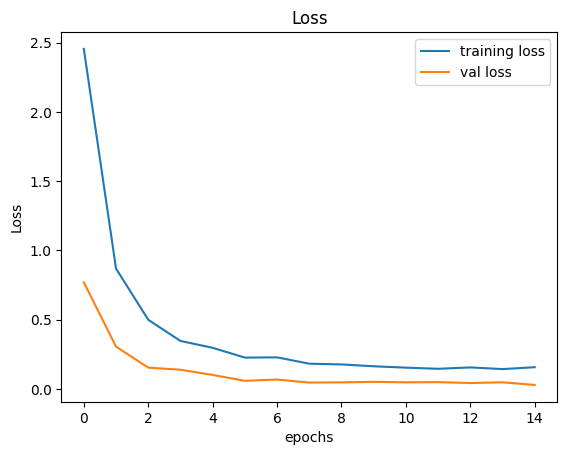

In [6]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
epochs = 15
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_data=(x_test, y_test))
plt.figure(0)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure(1)
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


TEST THE MODEL

In [7]:
from sklearn.metrics import accuracy_score
test = pd.read_csv(r"C:\Users\yalla\OneDrive\Desktop\PracticalAI\CourseAssets\Test.csv")
test_labels = test['ClassId'].values
test_img_path = r"C:\Users\yalla\OneDrive\Desktop\PracticalAI\CourseAssets"
test_imgs = test['Path'].values
test_data = []
for img in test_imgs:
    im = Image.open(test_img_path + '/' + img)
    im = im.resize((30,30))
    im = np.array(im)
    test_data.append(im)

test_data = np.array(test_data)
predictions = model.predict(test_data)


395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


SAVE THE MODEL

In [8]:
model.save('traffic_classifier.keras')


In [ ]:
from tkinter import filedialog
from tkinter import *
import tkinter as tk
from PIL import ImageTk, Image
from keras.models import load_model
import numpy as np
#load the trained model to classify traffic signs
model = load_model('traffic_classifier.keras')
#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)',
            3:'Speed limit (50km/h)',
            4:'Speed limit (60km/h)',
            5:'Speed limit (70km/h)',
            6:'Speed limit (80km/h)',
            7:'End of speed limit (80km/h)',
            8:'Speed limit (100km/h)',
            9:'Speed limit (120km/h)',
            10:'No passing',
            11:'No passing veh over 3.5 tons',
            12:'Right-of-way at intersection',
            13:'Priority road',
            14:'Yield',
            15:'Stop',
            16:'No vehicles',
            17:'Veh > 3.5 tons prohibited',
            18:'No entry',
            19:'General caution',
            20:'Dangerous curve left',
            21:'Dangerous curve right',
            22:'Double curve',
            23:'Bumpy road',
            24:'Slippery road',
            25:'Road narrows on the right',
            26:'Road work',
            27:'Traffic signals',
            28:'Pedestrians',
            29:'Children crossing',
            30:'Bicycles crossing',
            31:'Beware of ice/snow',
            32:'Wild animals crossing',
            33:'End speed + passing limits',
            34:'Turn right ahead',
            35:'Turn left ahead',
            36:'Ahead only',
            37:'Go straight or right',
            38:'Go straight or left',
            39:'Keep right',
            40:'Keep left',
            41:'Roundabout mandatory',
            42:'End of no passing',
            43:'End no passing veh > 3.5 tons' }
#initialize GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic Sign Classification')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = np.expand_dims(image, axis=0)
    image = np.array(image)
    pred = model.predict([image])[0]
    pred = np.argmax(pred)
    sign = classes[pred + 1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 

def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()
